<h2> Import Libraries </h2>

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_colwidth', -1)

<h2> Reading the Files </h2>

In [3]:
# Reading the files
train = pd.read_csv('Datasets/0train_tweets.csv',usecols=['tweet','label'])
test = pd.read_csv('Datasets/0test_tweets.csv')
pd.set_option('display.max_colwidth', -1)

print('Column names: %s'%(train.columns))
print('Train length: %s'%(len(train)))
print('Test length: %s '%(len(test)))

Column names: Index(['label', 'tweet'], dtype='object')
Train length: 31962
Test length: 17197 


In [4]:
train.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,0,listening to sad songs on a monday morning otw to work is sad
31960,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"
31961,0,thank you @user for you follow


<h2> Cleaning the Tweets </h2>

In [5]:
# Tweets cleaning
def clean_text(df,text_field):
    df[text_field] = df[text_field].str.lower()
    mystring = r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
    # the first filter is capture everything eclosed that starts with an @
    # and that has any single character from the range A-Z or a-z or 0-9 with more
    # than one element inside of that
    # the second filter is capture everything that is not a number, a lower or upper
    # case letter after the last line
    df[text_field] = df[text_field].apply(lambda element: re.sub(mystring,"",element))
    return df

train_clean = clean_text(train,'tweet')
test_clean = clean_text(test,'tweet')
train_clean.tail()

,label,tweet
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher
31959,0,listening to sad songs on a monday morning otw to work is sad
31960,1,sikh temple vandalised in in calgary wso condemns act
31961,0,thank you for you follow


<h2> Percentage </h2>

In [6]:
percentage = train_clean.groupby(['label']).count()
percentage

,tweet
label,
0,29720
1,2242


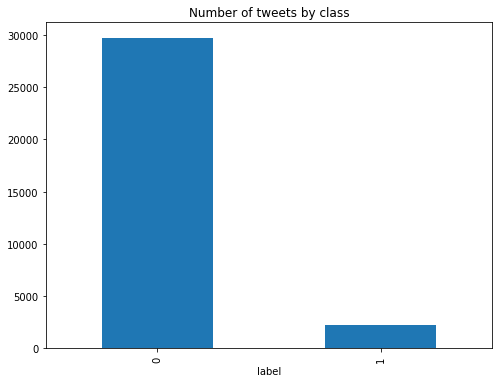

In [7]:
percentage.plot(kind='bar', figsize=(8, 6), legend=False, title='Number of tweets by class')
plt.show()

In [8]:

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(train_clean),
                                                                             (len(train_clean[train_clean['label'] == 0]) / (len(train_clean)*1.))*100,
                                                                            (len(train_clean[train_clean['label'] == 1]) / (len(train_clean)*1.))*100))

Train set has total 31962 entries with 92.99% negative, 7.01% positive


In [9]:
#print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),(len(X_test[y_test == 0]) / (len(X_test)*1.))*100,(len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

<h2> Top $k$-Tokens </h2>

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(train_clean['tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
print('Vocabulary Length : %s'%(len(cvec.vocabulary_)))

Vocabulary Length : 41409


In [12]:
neg_doc_matrix = cvec.transform(train_clean[train_clean['label'] == 0].tweet)
pos_doc_matrix = cvec.transform(train_clean[train_clean['label'] == 1].tweet)

In [13]:
neg_doc_matrix.toarray(), neg_doc_matrix.toarray().shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), (29720, 41409))

In [14]:
pos_doc_matrix.toarray(), pos_doc_matrix.toarray().shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), (2242, 41409))

In [15]:
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg_tf = np.sum(neg_doc_matrix,axis=0)

In [16]:
neg_tf, neg_tf.shape

(matrix([[2, 1, 1, ..., 1, 1, 2]], dtype=int64), (1, 41409))

In [17]:
pos_tf, pos_tf.shape

(matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64), (1, 41409))

In [18]:
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [19]:
neg

array([2, 1, 1, ..., 1, 1, 2], dtype=int64)

In [20]:
pos

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [22]:
term_freq_df.head()

,0,1
0000001,2,0
00027,1,0
001,1,0
0035,1,0
00h30,1,0


In [23]:
term_freq_df.columns = ['negative', 'positive']

In [24]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

In [25]:
term_freq_df.sort_values(by='total', ascending=False).head()

,negative,positive,total
the,9351,841,10192
to,9265,567,9832
you,4994,462,5456
and,4531,364,4895
in,4227,426,4653


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

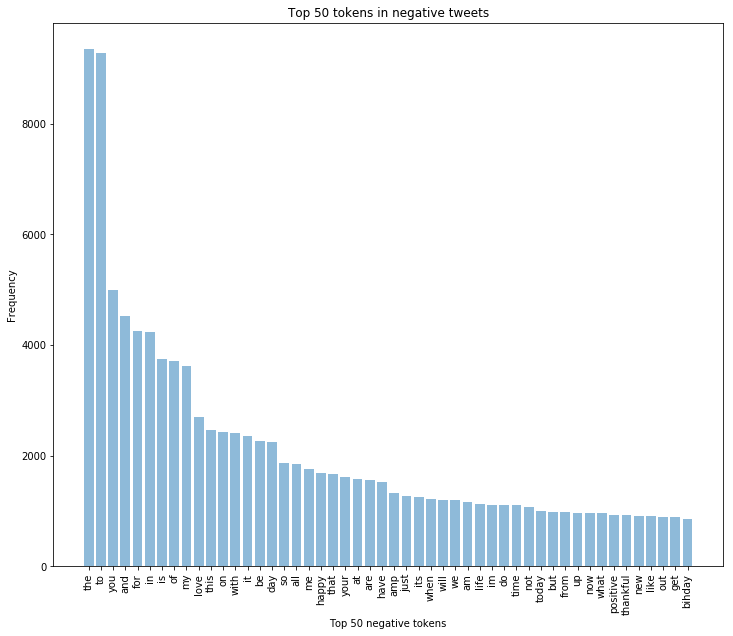

In [26]:
y_neg = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_neg, term_freq_df.sort_values(by='negative',ascending=False)['negative'][:50], align='center',alpha=0.5)
plt.xticks(y_neg,term_freq_df.sort_values(by='negative',ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

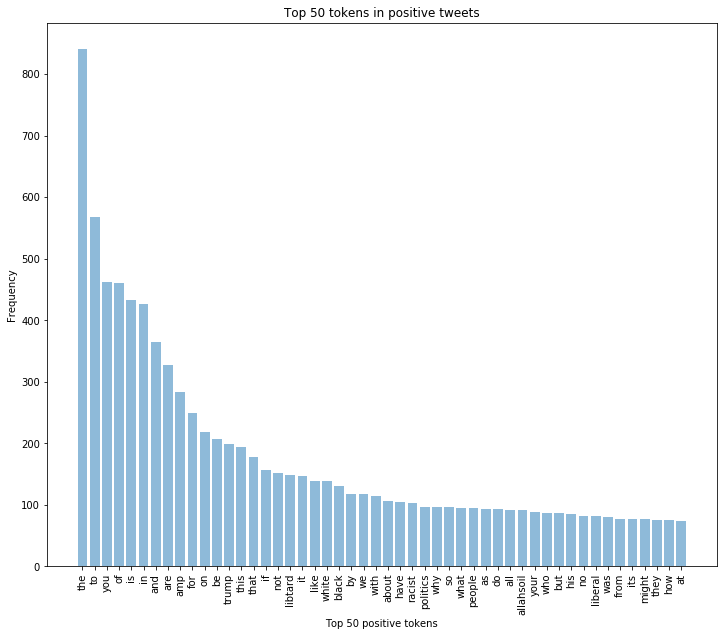

In [27]:
y_pos = range(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos,term_freq_df.sort_values(by='positive',ascending=False)['positive'][:50],align='center',alpha=0.5)
plt.xticks(y_pos,term_freq_df.sort_values(by='positive',ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')